In [1]:
import pandas as  pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("diabetes.csv")
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
730,3,130,78.0,23,79,28.4,0.323,34,1
266,0,138,0.0,0,0,36.3,0.933,25,1
766,1,126,60.0,0,0,30.1,0.349,47,1
670,6,165,68.0,26,168,33.6,0.631,49,0
561,0,198,66.0,32,274,41.3,0.502,28,1
641,4,128,70.0,0,0,34.3,0.303,24,0
352,3,61,82.0,28,0,34.4,0.243,46,0
433,2,139,75.0,0,0,25.6,0.167,29,0
349,5,0,80.0,32,0,41.0,0.346,37,1
748,3,187,70.0,22,200,36.4,0.408,36,1


In [3]:
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].median())

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.102865,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355282,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


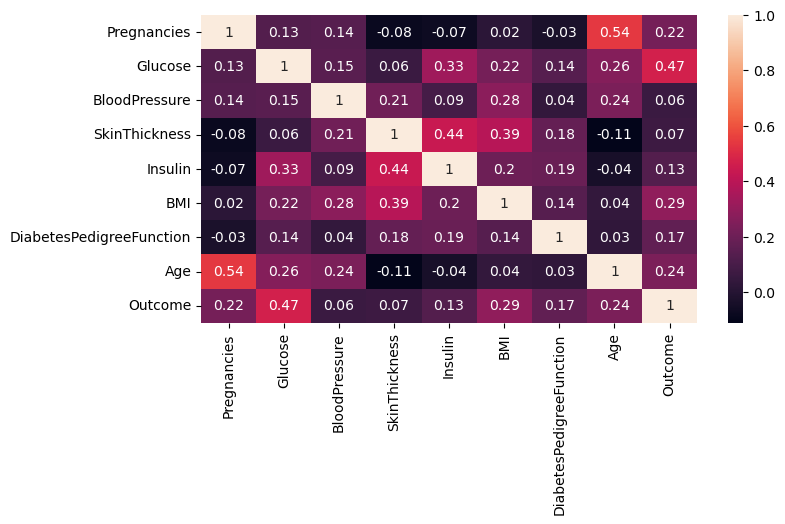

In [5]:
#check correltion matrix - to check the strength of variation bwtween variables
correlation_matrix= df.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
c = sn.heatmap(data=correlation_matrix, annot=True)

In [6]:
################feature engineering#######################
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [7]:
#converting data back to pandas dataframe
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = df.columns

In [8]:
#Separating features and response
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
response = ["Outcome"]
X=df_scaled[features]
y=df_scaled[response]

In [9]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [11]:
# import classifier

from sklearn.ensemble import RandomForestClassifier

# initialize the Regressor
RFR = RandomForestClassifier()

#fit the regressor to the data
RFR.fit(X_train,y_train)

#use the resulting model to predict value on the test sey
y_pred = RFR.predict(X_test)
accuracy = RFR.score(X_test,y_test)
print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[44  7]
 [ 6 20]] 

Mean Absolute Error: 0.16883116883116883
Mean Squared Error: 0.16883116883116883
Root Mean Squared Error: 0.4108907018066591 

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        51
         1.0       0.74      0.77      0.75        26

    accuracy                           0.83        77
   macro avg       0.81      0.82      0.81        77
weighted avg       0.83      0.83      0.83        77

Accuracy: 0.8311688311688312


C:\Users\DCL\AppData\Local\Temp\ipykernel_14944\4177214996.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train,y_train)


In [12]:
# import classifier
from sklearn.tree import DecisionTreeClassifier

# initialize the Regressor
DTC = DecisionTreeClassifier()

#fit the regressor to the data
DTC.fit(X_train,y_train)

#use the resulting model to predict value on the test sey
y_pred = DTC.predict(X_test)
accuracy = DTC.score(X_test,y_test)
print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[39 12]
 [ 7 19]] 

Mean Absolute Error: 0.24675324675324675
Mean Squared Error: 0.24675324675324675
Root Mean Squared Error: 0.496742636335202 

              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80        51
         1.0       0.61      0.73      0.67        26

    accuracy                           0.75        77
   macro avg       0.73      0.75      0.74        77
weighted avg       0.77      0.75      0.76        77

Accuracy: 0.7532467532467533


In [13]:
# import classifier
from sklearn.ensemble import BaggingClassifier
# initialize the Regressor
bag_model = BaggingClassifier(
    n_estimators = 100,
    max_samples = 0.8,
    random_state=0
)
#fit the regressor to the data

bag_model.fit(X_train,y_train)
y_pred = bag_model.predict(X_test)
accuracy = bag_model.score(X_test,y_test)
print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\DCL\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[44  7]
 [ 8 18]] 

Mean Absolute Error: 0.19480519480519481
Mean Squared Error: 0.19480519480519481
Root Mean Squared Error: 0.4413674147523748 

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85        51
         1.0       0.72      0.69      0.71        26

    accuracy                           0.81        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.80      0.81      0.80        77

Accuracy: 0.8051948051948052


In [14]:
# import classifier
from sklearn.ensemble import GradientBoostingClassifier
# initialize the Regressor
gb_model = GradientBoostingClassifier()
#fit the regressor to the data

gb_model.fit(X_train,y_train)

#use the resulting model to predict value on the test sey
y_pred = gb_model.predict(X_test)
accuracy = gb_model.score(X_test,y_test)
print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[42  9]
 [ 8 18]] 

Mean Absolute Error: 0.22077922077922077
Mean Squared Error: 0.22077922077922077
Root Mean Squared Error: 0.4698714938993648 

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        51
         1.0       0.67      0.69      0.68        26

    accuracy                           0.78        77
   macro avg       0.75      0.76      0.76        77
weighted avg       0.78      0.78      0.78        77

Accuracy: 0.7792207792207793


C:\Users\DCL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
